<a href="https://colab.research.google.com/github/nekMont/Machine-Learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to regresion with neural networks in tensorflow

There are many definitions for a regresion problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorted...prediction a number.

In [1]:
#import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Create data to view and fit

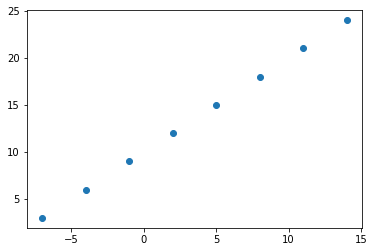

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

#Create features 
# We can think of x as our independent var
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0]) 

#and y as our dependent variable
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,Y)

In [3]:
# we can see is that y = x + 10 
Y == X + 10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Here we are just manually testing, the input value of one x value to predict one Y value

In [5]:
X[0],Y[0]

(-7.0, 3.0)

In [6]:
X[1],Y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape 
output_shape = Y[0].shape 
input_shape, output_shape

((), ())

#we see that they have no shape, they have no shape because our values are scalars

In [8]:
#example 
X[0].ndim

0

In [9]:
#in our case we want to build a MODEL that will take -7.0 and predict 3.0
#We will use one x value to predict one y value
X[0],Y[0] 

(-7.0, 3.0)

In [10]:
#lets turn our NumPy arrays into tensors 
X =tf.cast(tf.constant(X), dtype=tf.float32)
Y =tf.cast(tf.constant(Y), dtype=tf.float32)

X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape 
output_shape = Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

#how do we build a model to figure out the relationships?

## Steps in modelling with TensorFlow 
1. **Creating a model **- define the input and output layers, as well as the hidden layeers of a deep learning model. 
2. **Compiling a model** - define the loss function (in other word, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model). 
3. **Fitting a model** - letting the model try to find patterns between X & Y (features & labels) 

In [12]:

# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.6241 - mae: 13.6241
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.0821 - mae: 13.0821
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 12.5669 - mae: 12.5669
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 12.1129 - mae: 12.1129
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 11.6390 - mae: 11.6390
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 11.1191 - mae: 11.1191
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 10.4943 - mae: 10.4943
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 9.7312 - mae: 9.7312
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 8.7877 - mae: 8.7877
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 7.5524 - mae: 7.5524
Epoch 11/100
1/1 [==============================] - 0s 23

In [ ]:
#check x,y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
#try and make a prediction using our model 
y_pred = model.predict([17.0])

y_pred

1/1 [==============================] - 0s 320ms/step


array([[34.174862]], dtype=float32)

In [14]:
y_pred + 11

array([[45.174862]], dtype=float32)

#Improving our model

We can improve our model, by altering the steps we took to create a model. 

1. **Creating a model** - here we migh add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization funcion or perhaps the **learning rate** of the optimization fucntion. 

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data(give the model more examples to learn from). 


In [15]:
#lets see if we can make another improve our model 
#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),    
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 557ms/step - loss: 13.5394 - mae: 13.5394
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4703 - mae: 13.4703
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4012 - mae: 13.4012
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3320 - mae: 13.3320
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2628 - mae: 13.2628
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1936 - mae: 13.1936
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1243 - mae: 13.1243
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0550 - mae: 13.0550
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9857 - mae: 12.9857
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9162 - mae: 12.9162
Epoch 11/100
1/1 [==============================] -

In [16]:
#Lets remind ourselves of the data 
X,Y 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# lets make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 161ms/step


array([[32.068645]], dtype=float32)

##Evaulating a model

In practice, a typical workflow you'll go through when building neural networks is: 

building a mode -> fit it -> evaluate it -> tweak model -> fit it -> eval

When it comes to evaluation... there are 3 words you should memorize: 
"Visualize, visualize, visualize"

its a good idea to visualize: 

* The data - what data are we working with? what does it look like? 

* The model itself - what does our model look like? 

* The training of a model - how does a model perform while it learns? 

* The predictions of the model - how do the predictions of a model line up with the truth 




In [18]:
#make a bigger dataset 
X = tf.range(-100,100,4)
#start from -100 to 100, with a step of 4 
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# this is the pattern we want our model to learn 
Y = X + 10

Y 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

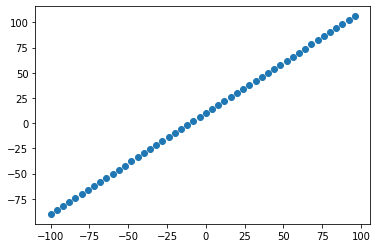

In [20]:
#lets visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,Y) 

### Concept of 3 sets... 
* **Training set** - model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data avaialble. 
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available 

In [21]:
# Check the length of how many samples we have 
#small sample set
len(X)

50

In [22]:
#split the data into train and test sets 
X_train = X[:40]#first 40 training samples  
Y_train = Y[:40]

X_test = X[40:]#last testing samples (20% of the data)
Y_test = Y[40:]#last tesing samples 

len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

### Visualizing the data 

now we've got our data in training and test sets... let's visualize it again.

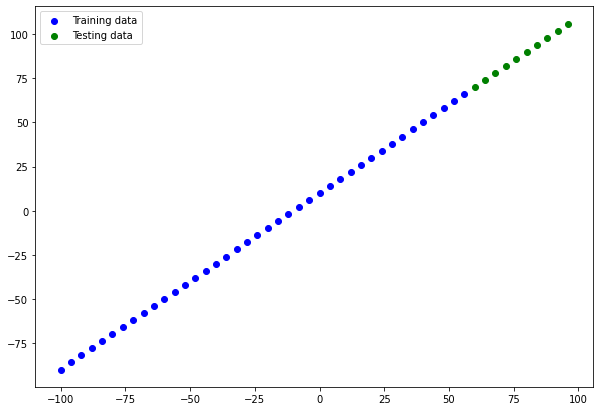

In [23]:
plt.figure(figsize=(10,7))
#plot training data in blue 
plt.scatter(X_train,Y_train, c="b", label="Training data")

#plot in green
plt.scatter(X_test,Y_test, c="g", label="Testing data")
#show legend 
plt.legend();

In [24]:
#Lets create our model 

#1. Create the model 
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1)
])

#2.compile the model 
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. fit the model
# model.fit(tf.expand_dims(X_train,-1),Y_train,epochs=100)

In [25]:
X[0],Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [26]:
#visualize the model 
#lets create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10,input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")
#compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in a model 
* Trainable parameters - these are the paramets (patterns) the model can update as it trains 
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other model during **transfer learning** 

we don't know what trainable params are 

**resource:** for more in depth overview of trainable, look into MIT intro to deep learning

**Excercise:** try playing around with the number of hidden units in the dense layer, see how that effects the number of paramerts (total and trainable) by calling 'model.summary()'


In [28]:
#lets fit our model to the training data
model.fit(X_train,Y_train,epochs = 150, verbose=0)
#verbose just states how you want to see the training progress for each epock

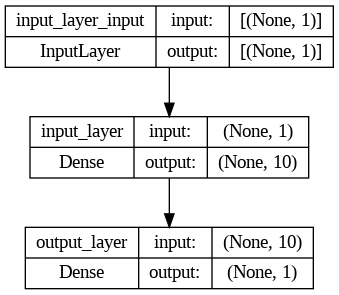

In [29]:
#one more way we can plot our model 
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)
#in the video he references line 26 above

###Visualizing our models predictions

To visualize predictions, it is a good idea to plot them against ground truth labels. 

Often you'll see this in the form of o'y_test' vs 'y_pred' (ground truth versus your model predictions

In [30]:
#make some predictions 
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 94ms/step


array([[ 82.96635 ],
       [ 88.32287 ],
       [ 93.6794  ],
       [ 99.03591 ],
       [104.39244 ],
       [109.74896 ],
       [115.10548 ],
       [120.462006],
       [125.81853 ],
       [131.17505 ]], dtype=float32)

In [31]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [32]:
#let's create a plotting function 
def plot_predictions(train_data = X_train,
                     train_labels=Y_train,
                     test_data=X_test, 
                     test_labels=Y_test,
                     predictions=y_pred): 

  """ 
  plots training data, test data and compares predictions to ground truth labels 
  """
  plt.figure(figsize=(10,7))
  #plot training data. 
  plt.scatter(train_data,train_labels,c = "b", label = "Training data")
  #plot testing data green 
  plt.scatter(test_data,test_labels, c="g",label="Tesing data")
  # plot model's predictions in red 
  plt.scatter(test_data, predictions, c="r",label="predictions")

  plt.legend();

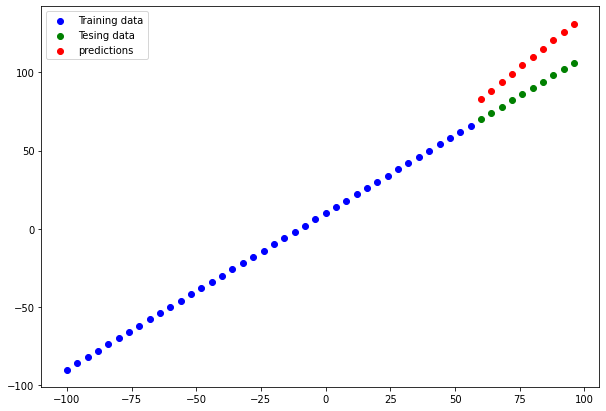

In [33]:
plot_predictions()

#editing the epochs on model fit will get our predictions plot closer to the
#the testing data.

### Evaluating our model's predictions with regression evaluation metrics 

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

Since we're working on a regression problem, two of the main metrics: 

* MAE - `mean absolute error`, "on average, how wrong is each of the my model's predictions

* MSE - `mean square error`, "square the average errors"

In [34]:
# Evaluate the model on the test
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 155ms/step - loss: 19.0707 - mae: 19.0707


[19.070697784423828, 19.070697784423828]

In [35]:
# calculte the mean absolute error
tf.metrics.mean_absolute_error(y_true=Y_test,
                               y_pred=tf.constant(y_pred))
#here we will get a metric for each of our test labels

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.60673 , 10.      , 10.73588 , 13.021547, 16.713953, 21.748962,
       27.105474, 32.462006, 37.818527, 43.17505 ], dtype=float32)>

In [36]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 82.96635 ],
       [ 88.32287 ],
       [ 93.6794  ],
       [ 99.03591 ],
       [104.39244 ],
       [109.74896 ],
       [115.10548 ],
       [120.462006],
       [125.81853 ],
       [131.17505 ]], dtype=float32)>

In [37]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
#to remove the 1 dimension on 74 

tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 82.96635 ,  88.32287 ,  93.6794  ,  99.03591 , 104.39244 ,
       109.74896 , 115.10548 , 120.462006, 125.81853 , 131.17505 ],
      dtype=float32)>

In [39]:
#calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=tf.squeeze(y_pred)) 
mae


<tf.Tensor: shape=(), dtype=float32, numpy=19.070698>

In [40]:
# Calculate the mean square error 
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=tf.squeeze(y_pred)) 
mse

#mse is larger due to it being squared in its intitial equation

<tf.Tensor: shape=(), dtype=float32, numpy=378.8728>

In [41]:
# make some functions to reuse MAE and MSE 
def mae(y_true,y_pred): 
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred) 
                                        )
  
def mse(y_true,y_pred): 
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model 

``` 
Build a model -> fit it -> tweak it -> evualate it -> fit it -> tweak it 
```
1. Get more data - get more examples for your model to train on (more oppurtunities to learn patterns or relationships between features and labels) 

2. make your model larger(using a more complex model)- this might com ein the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data. 

Lets do 3 modelling experiments 

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs 

2. `model_2` - 2 layers, trained for 100 epochs 

3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [42]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [43]:
#Model 1  

#set the random seed

tf.random.set_seed(42)

#1. Create the model 

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)
]) 

#2.compile the model

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), 
                metrics = ["mae"]) 

#3. fit the model 

model_1.fit(tf.expand_dims(X_train, axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 20.5801 - mae: 20.5801
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5453 - mae: 10.5453
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0105 - mae: 11.0105
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3501 - mae: 9.3501
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2275 - mae: 10.2275
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4821 - mae: 9.4821
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6130 - mae: 8.6130
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0430 - mae: 9.0430
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.8678 - mae: 18.8678
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1753 - mae: 10.1753
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

1/1 [==============================] - 0s 47ms/step


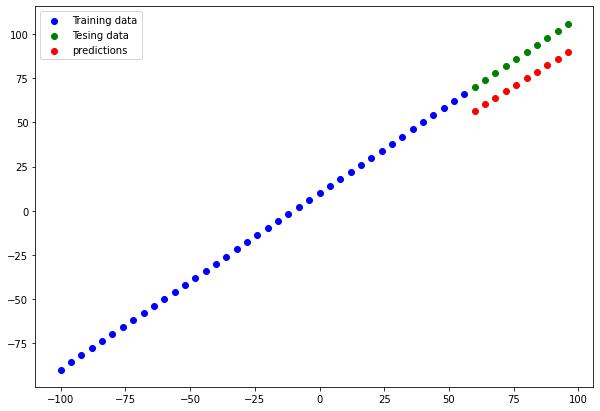

In [44]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [45]:
#Calculate model_1 evaluation metrics 
mae_1 = mae(Y_test, tf.squeeze(y_preds_1))
mse_1 = mse(Y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.9097>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.13794>)

In [46]:
#model_2 

#set random seed
tf.random.set_seed(42)

#1. create the model
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)]) 

#2. compile the model 
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["mse"])
#fit the model 
model_2.fit(tf.expand_dims(X_train, axis=-1),Y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 39.8273 - mse: 2196.8904
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 30.7290 - mse: 1249.8208
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 35.5221 - mse: 1906.3021
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 28.5780 - mse: 1202.4968
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 15.5167 - mse: 310.0314
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 12.3151 - mse: 190.6219
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6028 - mse: 164.5919
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2602 - mse: 182.1456
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 42.3659 - mse: 2872.6548
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 29.5152 - mse: 1233.4415
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 56ms/step


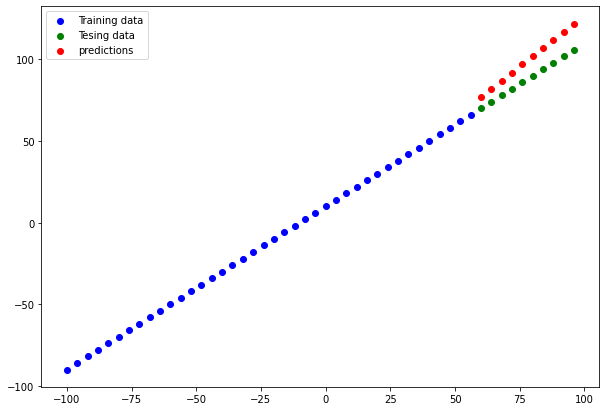

In [47]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [48]:
#Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, y_preds_2) 
mse_2 = mse(Y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.405244>,
 <tf.Tensor: shape=(), dtype=float32, numpy=138.52188>)

In [49]:
#model 3 
#2 layers, trained for 500 epochs
#set random seed 
tf.random.set_seed(42)

#1. Create the model 
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

#2. Compile the model 

model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. fit the model 

model_3.fit(tf.expand_dims(X_train, axis=-1),Y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 36.4998 - mae: 36.4998
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 26.3907 - mae: 26.3907
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 32.4259 - mae: 32.4259
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 23.5653 - mae: 23.5653
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.0551 - mae: 14.0551
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.2534 - mae: 11.2534
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.2661 - mae: 12.2661
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.9143 - mae: 10.9143
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 38.2721 - mae: 38.2721
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.8173 - mae: 25.8173
Epoch 11/500
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 97ms/step


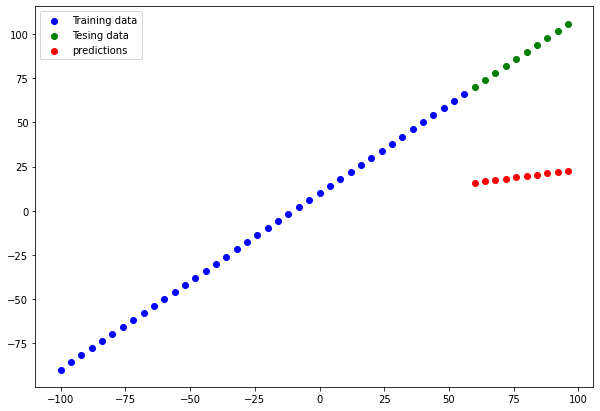

In [50]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
#calculate model_3 evaulation metrics 
mae_3 = mae(Y_test,y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
mae_3, mse_3 

(<tf.Tensor: shape=(), dtype=float32, numpy=68.734634>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4810.982>)

🔑 **Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary 

### Comparing the results of our experiments 

we've run a few experiments, let's comapre the results 

In [52]:
# Let's compare our model's results using a pandas DataFrame 
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]] 

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])

all_results 

,model,mae,mse
0,model_1,14.909700,223.137939
1,model_2,11.405244,138.521881
2,model_3,68.734634,4810.981934


In [53]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment" 

### Tracking your experiements 

One really good habit in machine learning modelling is to track the results of your experiments. 

And when doing so, it can be tedious if you're running lots of experiments. 

Luckily, there are tools to help us! 

📖**resource:** As you build more models, you'll want to look into using: 

*tensorBoard - a component of the tensorflow library to help track mdoelling experiemtns(we'll see this one later). 

*weight & biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)


### Saving our models 

Saving our models allows us to use them ouside of Google colab(or wherever they are trained) such as in a web application or mobile app

There are two main formats we can save our model's too: 

1. The SavedModel format(defualt)
2. The HDF5 format

In [54]:
#Save model using the SavedModel format 
#use if you want to use pure tensor flow
model_2.save("Best_model_SavedModel_format")

In [55]:
#tflow for full course 

In [56]:
#Save model using the HDF5 format
#this is good for large sets of data. 
#if you are trying to work outside of tensorflow

model_2.save("best_model_HDF5_format.h5")

##Loading in a saved model 

In [57]:
#Load in the SavedModel format model 
loaded_SavedModel_format = tf.keras.models.load_model("Best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Compare model_2 predictions with SavedModel format model predictions 
#comapring if your model matches our predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds



1/1 [==============================] - 0s 55ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [59]:
#Load in model using the .h5 format 
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
#comparying model with h5 

#model_2_preds = model_2.predictions(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
#model_2_preds, loaded_SavedModel_format_preds 
#computing the mean abs error 
mae(y_true=Y_test, y_pred=model_2_preds) == mae(y_true=Y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [62]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [63]:
loaded_SavedModel_format_preds.squeeze()

array([ 76.853096,  81.86469 ,  86.876274,  91.88787 ,  96.899445,
       101.91103 , 106.92263 , 111.93422 , 116.94579 , 121.95738 ],
      dtype=float32)

## Download a model(or any other file) from Google colab 

If you want to download your files from Google colab: 

1. You can go to the "files" tab and right click on the file you're after and click "download"
2. Use code(see the cell below).
3. Save it to Google drive by connecting Google drice and copying it there.

In [64]:
# Download a file from google colab 
from google.colab import files 

files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## How we will tackle a larger example

In [65]:
# import the required libraries 
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 

In [66]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance
#dependent variable charges
#independent var are age,sex,bmi, children, smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


One-hot encoding

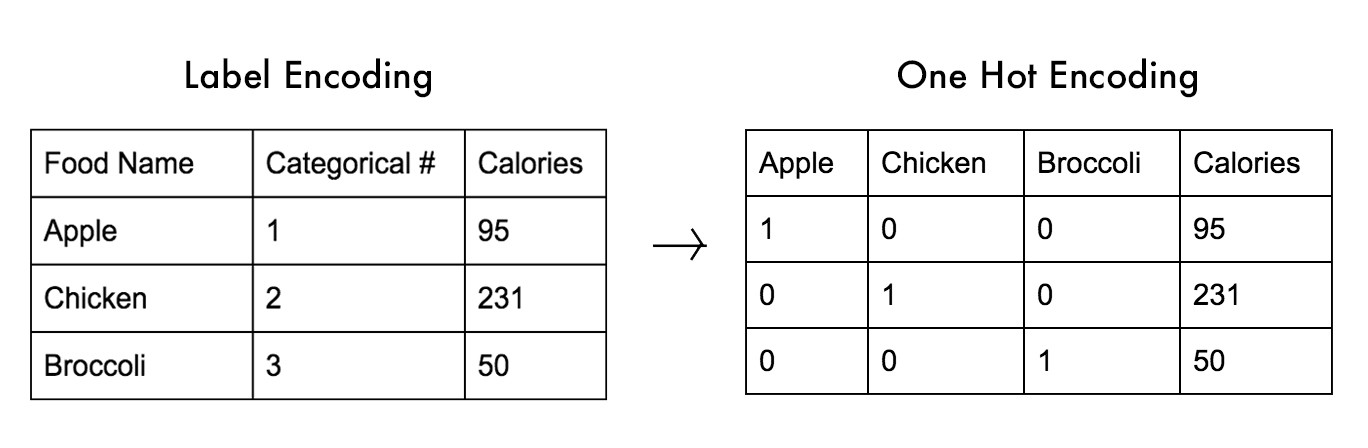

In [67]:
insurance_one_hot = pd.get_dummies(insurance)  
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [68]:
#create a X & y values(feautres and lables) 

X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"] 

#view X 
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [69]:
#view y 
y.head() 

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [70]:
#Create training and test sets 
from sklearn.model_selection import train_test_split
#previous split was a 80:20 which is a popular split
#we use a random split, so it is split the same way every time.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [71]:
#Build a neural network(sort of like model_2 above)

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [72]:
tf.random.set_seed(42) 

#1.create a model 
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)])

#2. train model/compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3.fit the model 
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8651.1191 - mae: 8651.1191
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.1289 - mae: 7884.1289
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.6777 - mae: 7585.6777
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7644.8076 - mae: 7644.8076
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7742.1816 - mae: 7742.1816
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.5005 - mae: 7613.5005
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7580.6558 - mae: 7580.6558
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7788.3340 - mae: 7788.3340
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7620.4277 - mae: 7620.4277
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7767.7148 - mae: 7767.7148

In [73]:
insurance_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                120       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [74]:
#check the results of the insurance data on the test data
insurance_model.evaluate(X_test, y_test)
#on the test data set it is performing slightly better than on the training. 

#mae this is telling us that we are wrong by about 7,000

9/9 [==============================] - 0s 2ms/step - loss: 5859.6377 - mae: 5859.6377


[5859.6376953125, 5859.6376953125]

In [75]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well, lets try to improve it.

To(try) improve our model, we'll run 2 experiments: 
1. add an extra layer with more hidden units 
2. train for longer 
3. (insert your own experiment here)

In [76]:
tf.random.set_seed(42)

#1. Create the model

insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                             tf.keras.layers.Dense(10),
                                             tf.keras.layers.Dense(1)])
# Changed from SGD() to Adam() because we were getting an NAN output with SGD()
#compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=["mae"])
#fit
insurance_model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13301.9678 - mae: 13301.9678
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13130.5107 - mae: 13130.5107
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12774.6016 - mae: 12774.6016
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12073.3086 - mae: 12073.3086
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10910.6055 - mae: 10910.6055
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9449.3242 - mae: 9449.3242
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8140.7515 - mae: 8140.7515
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.0488 - mae: 7537.0488
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7442.7437 - mae: 7442.7437
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.3945 - mae:

In [77]:
#we decreased the error rate by 2thousand 
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 1s 10ms/step - loss: 4745.8770 - mae: 4745.8770


[4745.876953125, 4745.876953125]

In [78]:
#insurance model 3 

#set seed 
tf.random.set_seed(42)

#create model
insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])
#compile the model 
insurance_model_3.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(X_train,y_train,epochs=600)

Epoch 1/600
34/34 [==============================] - 1s 2ms/step - loss: 13318.8311 - mae: 13318.8311
Epoch 2/600
34/34 [==============================] - 0s 2ms/step - loss: 13145.6992 - mae: 13145.6992
Epoch 3/600
34/34 [==============================] - 0s 2ms/step - loss: 12801.5127 - mae: 12801.5127
Epoch 4/600
34/34 [==============================] - 0s 2ms/step - loss: 12134.2764 - mae: 12134.2764
Epoch 5/600
34/34 [==============================] - 0s 2ms/step - loss: 10999.9014 - mae: 10999.9014
Epoch 6/600
34/34 [==============================] - 0s 2ms/step - loss: 9516.5098 - mae: 9516.5098
Epoch 7/600
34/34 [==============================] - 0s 2ms/step - loss: 8150.9683 - mae: 8150.9683
Epoch 8/600
34/34 [==============================] - 0s 2ms/step - loss: 7512.5552 - mae: 7512.5552
Epoch 9/600
34/34 [==============================] - 0s 2ms/step - loss: 7414.5952 - mae: 7414.5952
Epoch 10/600
34/34 [==============================] - 0s 2ms/step - loss: 7394.1616 - mae:

In [79]:
#evaluate
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.6055 - mae: 3160.6055


[3160.60546875, 3160.60546875]

In [80]:
#first model
insurance_model.evaluate(X_test,y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 5859.6377 - mae: 5859.6377


[5859.6376953125, 5859.6376953125]

Text(0.5, 0, 'epochs')

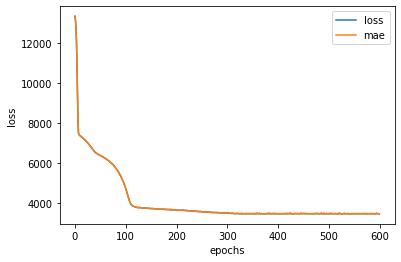

In [81]:
#plot history(also known as a loss curve or a training curve)
#using pandas
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#refer to our epochs, each epoch we are decreasing.

**How long should you train for?**

It depends. Really... it depends on the problem youa are working on. 
So TensorFlow has a solution, its called the early stopping callback.

It is a tensorflow component you can add to your model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization. 

If you're not sure which to use, you can try both and see which one performs better.

***why scale*** 
- "Many machine learning algorithsm perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include: 

  - linear and logistic regression 
  - nearest neighbors
  - neural networks(what we are building!)
  - support vector machines with radial bias kernal functions 
  - principal components analysis 
  - linear discriminant analysis 

<Axes: ylabel='Frequency'>

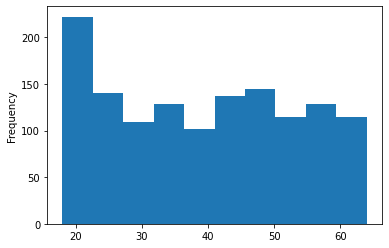

In [82]:
X["age"].plot(kind="hist")

In [83]:
X["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

<Axes: ylabel='Frequency'>

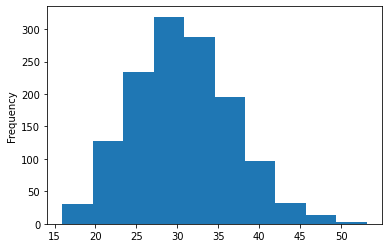

In [84]:
X["bmi"].plot(kind="hist")

In [85]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [86]:
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 

#read in insurance dataframe 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-learn 

In [87]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column Transformer. 
#the name is self explanatory. 
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), #we choose these because they are numerical.
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]) #we one hot encode because this data is not numerical

) 

#Create X & y 
X = insurance.drop("charges",axis=1)
#what are we trying to predict? we are trying to predict the charges
y = insurance["charges"]

#what do we want our model to learn on ?

#Build our train and test sets
#test data is data we have never secene before. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#fit the column transformer to our training data.
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [88]:
#what does our data look like? 
X_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [89]:
#based on our ct
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [90]:
#check the shapes.
X_train.shape, X_train_normal.shape
#we added some extra columns in the train above. 

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now lets build a neural network model to fit on our normalized data. 

In [91]:
#Build a neural network model to fit on our normalized data.

#set the random seed
tf.random.set_seed(42)

#layers
insurance_model_01 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)])

#compile the model 
insurance_model_01.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"]
                           )
#fit the model 
insurance_model_01.fit(X_train_normal, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13344.1289 - mae: 13344.1289
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13335.5518 - mae: 13335.5518
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13313.5508 - mae: 13313.5508
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13266.8086 - mae: 13266.8086
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13184.0381 - mae: 13184.0381
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13054.1045 - mae: 13054.1045
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12866.7773 - mae: 12866.7773
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12612.0820 - mae: 12612.0820
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12279.9287 - mae: 12279.9287
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11868.10

In [92]:
#Evaluate our insurance model trained on normalized data. 
insurance_model_01.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3437.2197 - mae: 3437.2197


[3437.2197265625, 3437.2197265625]

what we did above fixed our prediction by 30%